In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def normalize(X):
    m = X.shape[0]
    mean = np.sum(X,axis=0)/m
    var = np.sum((X-mean)**2,axis=0)/m
    sd = np.sqrt(var)
    X = (X-mean)/sd
    return X

def seperateData(dataX,dataY):
    alaska=[]
    canada=[]
    for i in range(dataY.shape[0]):
        if(dataY[i]=="Alaska"):
            alaska.append(dataX[i])
        else:
            canada.append(dataX[i])
    phi = len(alaska)/dataY.shape[0]
    return phi,np.asarray(alaska),np.asarray(canada)
            
def calculateMean(data):
    return np.sum(data,axis=0)/data.shape[0]

# Pass data from which mean has already been subtracted
def calculateCovariance(data):
    return np.dot(data.T,data)/data.shape[0]

# 0 = Alaska    1 = canada
def calculateCoeffLinear(phi,m0,m1,c0,c1):
    temp = (np.dot(np.dot(m0,np.linalg.inv(c0)),m0.T)-np.dot(np.dot(m1,np.linalg.inv(c1)),m1.T))/2
    intercept = np.log(phi/(1-phi)) + temp
    coeff = np.dot(np.linalg.inv(c1),m1.T)-np.dot(np.linalg.inv(c0),m0.T)
    return intercept[0],coeff[0],coeff[1]

In [18]:
dataX = np.loadtxt('../ass1_data/data/q4/q4x.dat')
dataY = np.reshape(np.genfromtxt('../ass1_data/data/q4/q4y.dat',dtype=None,encoding='ascii'),(dataX.shape[0],-1))
dataX = normalize(dataX)
print(dataX.shape)
print(dataY.shape)

(100, 2)
(100, 1)


In [19]:
phi,alaska,canada = seperateData(dataX,dataY)
mu0 = np.reshape(calculateMean(alaska),(-1,2))
mu1 = np.reshape(calculateMean(canada),(-1,2))
covData = np.append(alaska-mu0,canada-mu1,axis=0)
covMat = calculateCovariance(covData)
_intL,pAL,pCL = calculateCoeffLinear(phi,mu0,mu1,covMat,covMat)
print(phi)
print(mu0.shape)
print(mu1.shape)
print(covMat.shape)

0.5
(1, 2)
(1, 2)
(2, 2)


In [20]:
def calLinBound(X,_int,A,C):
    return (_int-X*A)/C

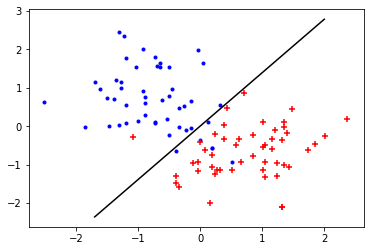

In [31]:
fig = plt.figure(0)
ax = plt.gca()
plt.scatter(alaska[:,0:1],alaska[:,1:2],color="blue",marker=".")
plt.scatter(canada[:,0:1],canada[:,1:2],color="red",marker="+")

x1 = np.linspace(-1.7,2,100)
y1 = calLinBound(x1,_intL,pAL,pCL)

plt.plot(x1,y1,color="black")

In [22]:
covMat0 = calculateCovariance(alaska-mu0)
covMat1 = calculateCovariance(canada-mu1)
print(covMat0.shape)
print(covMat1.shape)

(2, 2)
(2, 2)


In [23]:
def calculateCoeffQuad(phi,m0,m1,c0,c1):
    temp = (np.dot(np.dot(m0,np.linalg.inv(c0)),m0.T)-np.dot(np.dot(m1,np.linalg.inv(c1)),m1.T))/2
    c = np.log(phi/(1-phi)) + np.log(np.linalg.det(c0)/np.linalg.det(c1)) + temp
    t1 = np.dot(np.linalg.inv(c1),m1.T)-np.dot(np.linalg.inv(c0),m0.T)
    t2 = np.linalg.inv(c1)-np.linalg.inv(c0)
    
    return t2,t1,c

def calQuadBound(X,t2,t1,c1):
    a = t2[1][1]
    b = X*(t2[1][0]+t2[0][1]) - 2*t1[1][0]
    c = t2[0][0]*(X**2) - 2*X*t1[0][0] - 2*c1

    roots = []
    for i in range(len(X)):
        roots.append(max(np.roots([a,b[i],c[0][i]])))
    
    return roots

[[-0.6713478  -1.28683634]
 [-1.28683634  0.86593198]]
[[ 3.80785319]
 [-2.85967306]]
[[-0.49198061]]


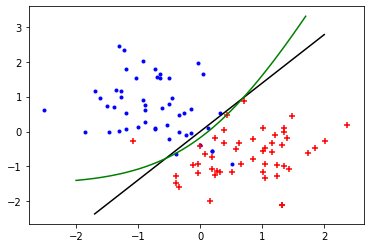

In [32]:
t2,t1,c = calculateCoeffQuad(phi,mu0,mu1,covMat0,covMat1)
print(t2)
print(t1)
print(c)

fig1 = plt.figure(1)
ax1 = plt.gca()
plt.scatter(alaska[:,0:1],alaska[:,1:2],color="blue",marker=".")
plt.scatter(canada[:,0:1],canada[:,1:2],color="red",marker="+")

x1 = np.linspace(-1.7,2,100)
y1 = calLinBound(x1,_intL,pAL,pCL)

plt.plot(x1,y1,color="black")

x2 = np.linspace(-2,1.7,100)
y2 = calQuadBound(x2,t2,t1,c)

plt.plot(x2,y2,color="green")